In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.cm as cm
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [2]:
%matplotlib inline

# Import data set

In [3]:
df = pd.read_csv('food_coded.csv')

# Removing all the features that are not needed.
# all the non numerical, and features that have little effect on,
# deciding a place to live, are removed.

In [4]:
droping = ['GPA',
 'Gender',
 'breakfast',
 'calories_chicken',
 'calories_day',
 'calories_scone',
 'coffee',
 'comfort_food',
 'comfort_food_reasons',
 'comfort_food_reasons_coded',
 'comfort_food_reasons_coded.1',
 'cuisine',
 'diet_current',
 'diet_current_coded',
 'drink',
 'eating_changes',
 'eating_changes_coded',
 'eating_changes_coded1',
 'father_education',
 'father_profession',
 'fav_cuisine',
 'fav_cuisine_coded',
 'fav_food',
 'food_childhood',
 'fries',
 'grade_level',
 'greek_food',
 'healthy_feeling',
 'healthy_meal',
 'ideal_diet',
 'ideal_diet_coded',
 'indian_food',
 'italian_food',
 'life_rewarding',
 'marital_status',
 'meals_dinner_friend',
 'mother_education',
 'mother_profession',
 'nutritional_check',
 'persian_food',
 'self_perception_weight',
 'soup','thai_food',
 'tortilla_calories',
 'turkey_calories',
 'type_sports','vitamins',
 'waffle_calories',
 'weight']
df3 = df.drop(droping, axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           122 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     116 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       112 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         124 non-null    float64
 7   on_off_campus  124 non-null    float64
 8   parents_cook   125 non-null    int64  
 9   pay_meal_out   125 non-null    int64  
 10  sports         123 non-null    float64
 11  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 11.8 KB


# Replacing all the null values with the current mean of the features

In [5]:
a = (0, 0, 0, 0, 0, 0)
a = df3['employment'].mean(), df3['exercise'].mean(),df3['income'].mean(), df3['on_off_campus'].mean(), df3['sports'].mean(), df3['cook'].mean()
a = pd.Series(a).apply(lambda x : int(x))
for i, col in enumerate(['employment', 'exercise', 'income', 'on_off_campus', 'sports', 'cook']):
    df3[col].fillna(a[i], inplace=True)

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           125 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     125 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       125 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         125 non-null    float64
 7   on_off_campus  125 non-null    float64
 8   parents_cook   125 non-null    int64  
 9   pay_meal_out   125 non-null    int64  
 10  sports         125 non-null    float64
 11  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 11.8 KB


# Visualizing using the 'boxplot' of the seaborn library.

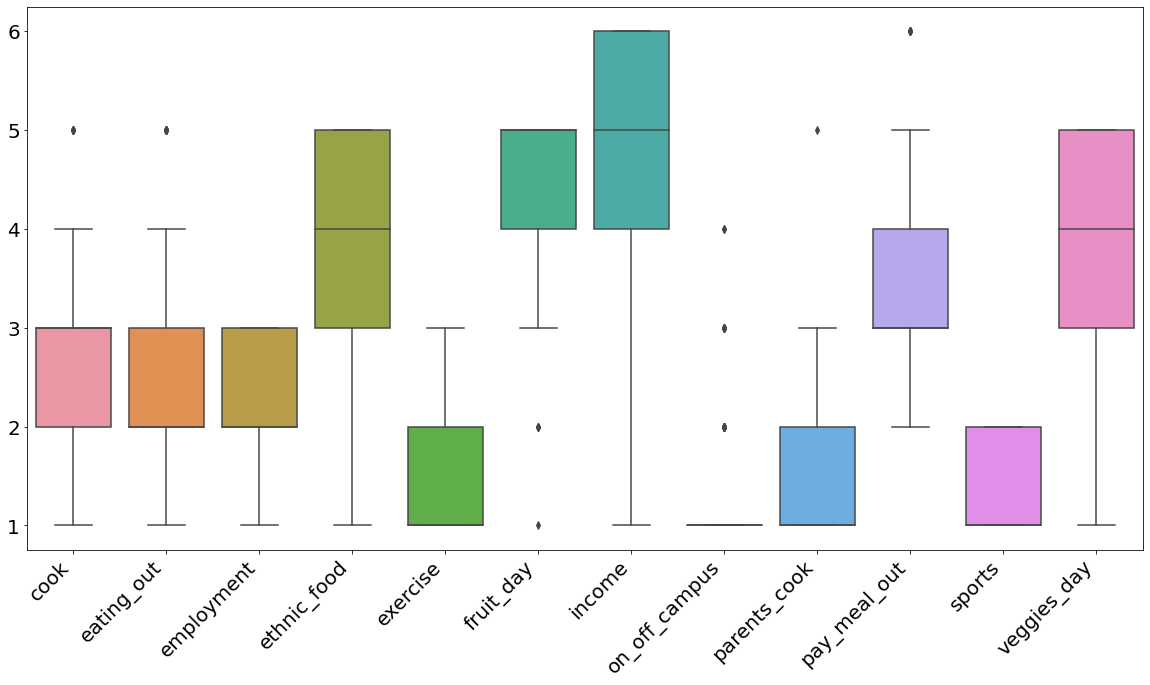

In [7]:
plt.figure(figsize=(20, 10))
sns.boxplot

ax = sns.boxplot(data = df3)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')
plt.savefig('cleaned.png')
plt.show()

# it seems that people prefer to eat out less for low income, and high income eat sometimes
# preference of ethinc food seems to increased with the income
# people eat more fruits with more income(according to data at least)


# Apply the K-Means algorithm

## Using Elbow method to decide the number of clusters.

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


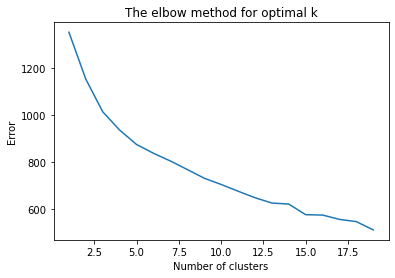

In [11]:
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, allowing us to observe the 'The elbow'

plt.plot(range(1, 20), wcss)
plt.title("The elbow method for optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Error")
plt.show()

# the elbow can be seen some what around the k value 3

In [9]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df3)
df3['Cluster']=kmeans.labels_

C:\Users\ROHITS~1\AppData\Local\Temp/ipykernel_13588/2049181312.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sns.boxplot(data = df3[df3['Cluster'] == k].drop('Cluster',1), ax=axes[k])
C:\Users\ROHITS~1\AppData\Local\Temp/ipykernel_13588/2049181312.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sns.boxplot(data = df3[df3['Cluster'] == k].drop('Cluster',1), ax=axes[k])
C:\Users\ROHITS~1\AppData\Local\Temp/ipykernel_13588/2049181312.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sns.boxplot(data = df3[df3['Cluster'] == k].drop('Cluster',1), ax=axes[k])


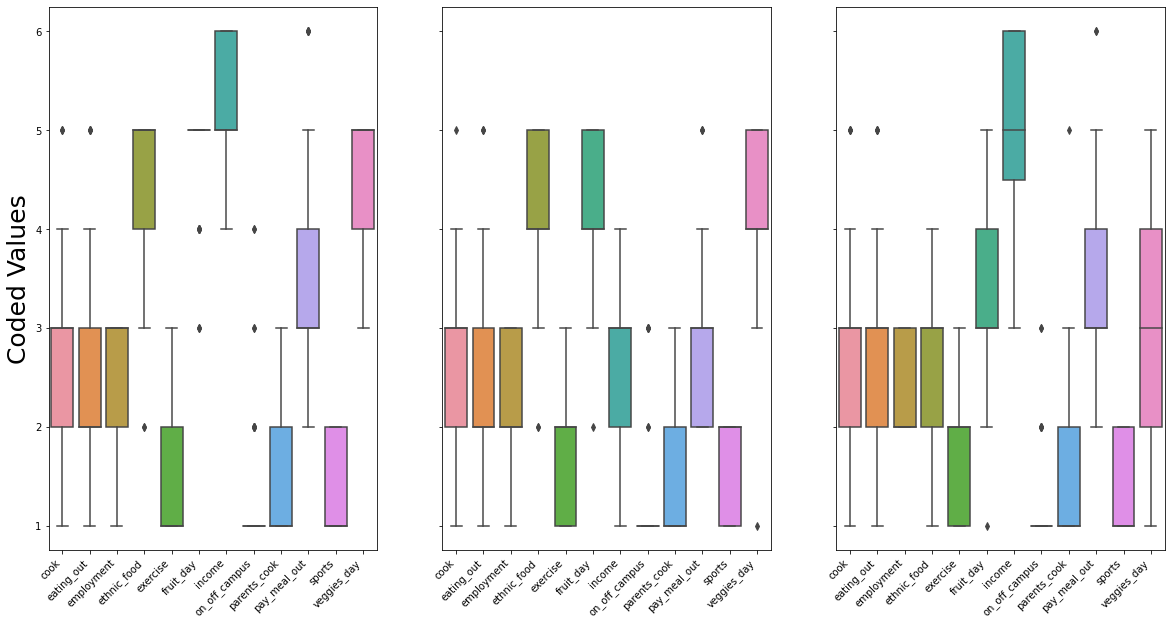

In [10]:
fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=25)

for k in range(kclusters):
     plt.sca(axes[k])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(data = df3[df3['Cluster'] == k].drop('Cluster',1), ax=axes[k])
plt.savefig("kmeans.png")  
plt.show()

# People with less income
1. people with less income(according to the data) tend to eat out less.
2. People with less income prefer to cook at home are or are more likely to cook at home.
3. People with less income eat out less often and want to buy grocries for home cook.

# People with more income
1. As the income people increases(according to the data) their preference for ethnic food increases.
2. It is the same with food, they want to eat more fruits.
3. preference of veggies of veggies is also increased.

In conclusion the the people with less income need more shops and groceries around their place to buy veggies for home cook.

People with more need prefer to have ethnic restaurant around them, and shop to buy fruits 


# The number of clusters choose is 3 because it seems that data is nicely clustered around, income
# Any less than that the visualization is messy 
# And more than that the visualization is also messy

In [11]:
search_query = 'PG Apartments' #Search for residential locations 28.364628, 77.539879
radius = 30000 #Set the radius to 30 kilometres due to remote college location
latitude=28.364628 #College location(Galgotia's University)
longitude=77.539879
college = 'Galgotias University'

In [12]:
CLIENT_ID = 'S0KV55VKN1SDRR2B2Z1TIMA33Y230VSBQSFTQ1ASVJEUGSME'#  
CLIENT_SECRET = 'L3Y3A3KCDNGSTD32Y2XTQQ0GEVU2WVYEFXPI1RPRU2PRJFTT' # 
VERSION = '20210604'
LIMIT = 200

In [13]:
url = f'https://api.foursquare.com/v2/venues/search?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&ll={latitude},{longitude}&v={VERSION}&query={search_query}&radius={radius}&limit={LIMIT}'

In [14]:
results = requests.get(url).json()

In [15]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\ROHITS~1\AppData\Local\Temp/ipykernel_13588/4005429704.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.crossStreet,location.postalCode,location.city,location.state
0,4ec168ae30f82a2e13d52a40,Black Gold Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1638565310,False,28.455142,77.514105,"[{'label': 'display', 'lat': 28.45514197248049...",10387,IN,India,[India],NaN,NaN,NaN,NaN,NaN
1,535f3271498ee48607aea91a,PGDM Hall,"[{'id': '4bf58dd8d48988d1a0941735', 'name': 'C...",v-1638565310,False,28.470884,77.482033,"[{'label': 'display', 'lat': 28.47088432312011...",13114,IN,India,[India],NaN,NaN,NaN,NaN,NaN
2,4c80bcc7d34ca143a8ab1b80,Icon Apartments,[],v-1638565310,False,28.461677,77.515641,"[{'label': 'display', 'lat': 28.461677, 'lng':...",11060,IN,India,[India],NaN,NaN,NaN,NaN,NaN
3,51e4f94a498e834f69f32da2,Abhishek PG,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1638565310,False,28.541406,77.335435,"[{'label': 'display', 'lat': 28.54140570515523...",28064,IN,India,"[Sector 126 (Opposite Amity Gate 2), Noida 201...",Sector 126,Opposite Amity Gate 2,201304,Noida,Uttar Pradesh
4,57d1c577498efd6248631caf,Sai Park Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1638565310,False,28.412214,77.336770,"[{'label': 'display', 'lat': 28.412214, 'lng':...",20584,IN,India,"[Farīdābād, Haryāna, India]",NaN,NaN,NaN,Farīdābād,Haryāna


In [16]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.drop([0, 35, 37, 17, 23, 26,27, 34, 28, 40],axis=0,inplace=True) #remove some unwanted locations like hotels
dataframe_filtered.drop(['cc','country','state','city'],axis=1,inplace=True) #no need for those columns as we know we're in Greater Noida,IN
dataframe_filtered.head()

,name,categories,lat,lng,labeledLatLngs,distance,formattedAddress,address,crossStreet,postalCode,id
1,PGDM Hall,College Classroom,28.470884,77.482033,"[{'label': 'display', 'lat': 28.47088432312011...",13114,[India],NaN,NaN,NaN,535f3271498ee48607aea91a
2,Icon Apartments,None,28.461677,77.515641,"[{'label': 'display', 'lat': 28.461677, 'lng':...",11060,[India],NaN,NaN,NaN,4c80bcc7d34ca143a8ab1b80
3,Abhishek PG,Residential Building (Apartment / Condo),28.541406,77.335435,"[{'label': 'display', 'lat': 28.54140570515523...",28064,"[Sector 126 (Opposite Amity Gate 2), Noida 201...",Sector 126,Opposite Amity Gate 2,201304,51e4f94a498e834f69f32da2
4,Sai Park Apartments,Residential Building (Apartment / Condo),28.412214,77.336770,"[{'label': 'display', 'lat': 28.412214, 'lng':...",20584,"[Farīdābād, Haryāna, India]",NaN,NaN,NaN,57d1c577498efd6248631caf
5,Shanti Niwas PG,Residential Building (Apartment / Condo),28.542465,77.338409,"[{'label': 'display', 'lat': 28.54246520996093...",27941,"[Sector 126 (Raipur), Noida 201304, Uttar Prad...",Sector 126,Raipur,201304,50f28cb0e4b0d13e7cb9e53f


<i class="fas fa-university"></i>

In [17]:
#define coordinates of the college

map_Galgotia=folium.Map(location=[28.364628,77.539879],zoom_start=11)
# Marking College on the Map with red color.
folium.Marker([28.364628, 77.539879], popup=college, tooltip="Galgoitas University").add_to(map_Galgotia) 
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
names = list(dataframe_filtered.name)
distance = list(dataframe_filtered.distance.apply(lambda x : x/1000)) # extracting distance from the data

for lat, lng, name, dist in zip(latitudes, longitudes, names, distance):
    # Note: the numbers are distance in Kilometers
    color = 'green'
    d = float(dist)
    if d < 10:
        color = 'pink'
    elif d >= 10 and d < 20:
        color = 'green'
    elif d >= 20 and d <= 30:
        color = 'orange'
    elif d > 30 and d <= 35:
        color = 'red'
    else:
        color = 'darkred'

    folium.Marker([lat, lng], popup=f"{name}, {dist} KM",icon=folium.Icon(color=color), tooltip=name).add_to(map_Galgotia)    
    
# add incidents to map
map_Galgotia.add_child(locations)

# add incidents to map
map_Galgotia.add_child(locations)
map_Galgotia



1. blue marker is my college
2. green are the location between 10 and 20 kilomter
3. orange are the distance between 20 and 30 kilometer
4. red are the distance between 30 to 35 km
5. darkred are the distance greater than 35(not at all feasable and no location given)
6. pink could have the distance below 10 kilometer but data could not show that, but there are two location slightly greater than 10(green).

# Conclusion
1. There were no location around University, within 10 KM, and only two locations between 10 and 11 KM, that too are apartments.
2. The location data around Galgotias University is not very good, thus there might be some locations that didn't reflect in the above map
3. Students can look for apartments **around**, 'Knowledge Park' Area.
4. For better analysis need more data around the locations.
5. As we cross the 20 KM mark we start to see some PGs and more apartments, there are pgs **around** Amity university
6. You would need a transport facility to drop and pick you up from the univeristy.
7. PGs are more clustered around Noida, but they are at a distance of more than 25 KM
8. There is one more university around Galgotias University, so business owners should think about building something there, that accomodates the students there.